#### Importing Libraries

In [1]:
import spectral
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import xgboost as xgb

#### Loading and Preprocessing Data

In [2]:
image_data=scipy.io.loadmat("Dataset/Indian_pines_corrected.mat")["indian_pines_corrected"]
ground_truth=scipy.io.loadmat("Dataset/Indian_pines_gt.mat")["indian_pines_gt"]

print("Hyperspectral Image Shape:",image_data.shape) 
print("Ground Truth Shape:",ground_truth.shape)  

Hyperspectral Image Shape: (145, 145, 200)
Ground Truth Shape: (145, 145)


In [3]:
X=image_data.reshape(-1,image_data.shape[-1]) 
y=ground_truth.ravel()  

valid_pixels=y>0
X=X[valid_pixels]
y=y[valid_pixels]  

scaler=StandardScaler()
X=scaler.fit_transform(X)

print("Final Features Shape:",X.shape)  
print("Final Labels Shape:",y.shape)  

Final Features Shape: (10249, 200)
Final Labels Shape: (10249,)


#### Split Data into Test and Train

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("Training Set:",X_train.shape,y_train.shape)
print("Testing Set:",X_test.shape,y_test.shape)

Training Set: (8199, 200) (8199,)
Testing Set: (2050, 200) (2050,)


#### Train and Evaluate SVM

In [5]:
svm_model=SVC(kernel="rbf",C=10,gamma="scale")
svm_model.fit(X_train, y_train)

y_pred_svm=svm_model.predict(X_test)

svm_acc=accuracy_score(y_test,y_pred_svm)
print("SVM Accuracy:",svm_acc)

SVM Accuracy: 0.9


#### Train and Evaluate Random Forest

In [6]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

y_pred_rf=rf_model.predict(X_test)

rf_acc=accuracy_score(y_test,y_pred_rf)
print("Random Forest Accuracy:",rf_acc)

Random Forest Accuracy: 0.8726829268292683


#### Predict Full Image with Trained Models

In [7]:
new_image=scipy.io.loadmat("Dataset/Indian_pines_corrected.mat")["indian_pines_corrected"]

X_new=new_image.reshape(-1, new_image.shape[-1])
X_new=scaler.transform(X_new)

y_new_pred=svm_model.predict(X_new)  
classified_image=y_new_pred.reshape(new_image.shape[:2])  

In [8]:
new_image=scipy.io.loadmat("Dataset/Indian_pines_corrected.mat")["indian_pines_corrected"]

X_new=new_image.reshape(-1,new_image.shape[-1])
X_new=scaler.transform(X_new)

y_new_pred=rf_model.predict(X_new) 
classified_image_rf=y_new_pred.reshape(new_image.shape[:2])  

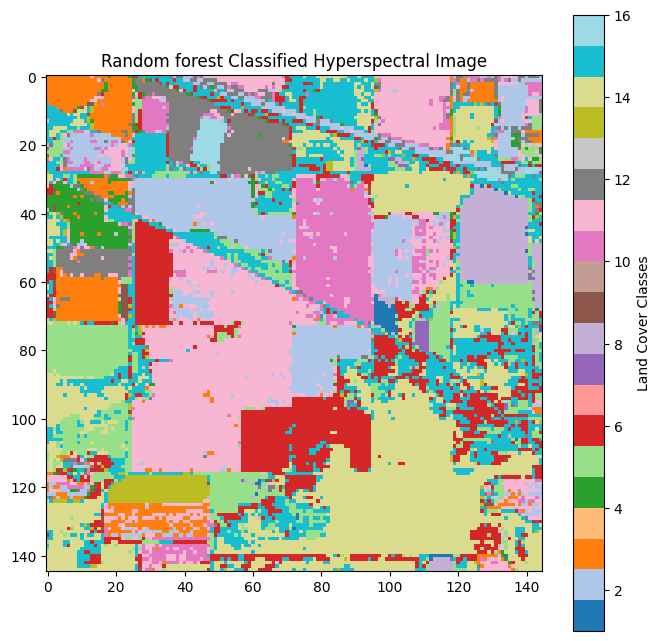

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(classified_image,cmap="tab20")
plt.colorbar(label="Land Cover Classes")
plt.title("Random forest Classified Hyperspectral Image")
plt.show()

#### Evaluating Different ML Models

In [10]:
classifiers = {
    "SVM": SVC(kernel="rbf",C=10,gamma="scale"),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100,random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
}

results={}

for name,model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train,y_train) 
    y_pred=model.predict(X_test) 
    acc=accuracy_score(y_test,y_pred) 
    results[name]=acc
    print(f"{name} Accuracy: {acc:.4f}")

print("\n=== Model Performance Comparison ===")
for model, acc in results.items():
    print(f"{model}:{acc:.4f}")

Training SVM...
SVM Accuracy: 0.9000
Training Random Forest...
Random Forest Accuracy: 0.8727
Training KNN...
KNN Accuracy: 0.7639
Training Decision Tree...
Decision Tree Accuracy: 0.7541
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8556
Training Naive Bayes...
Naive Bayes Accuracy: 0.5024
Training Logistic Regression...
Logistic Regression Accuracy: 0.8502

=== Model Performance Comparison ===
SVM:0.9000
Random Forest:0.8727
KNN:0.7639
Decision Tree:0.7541
Gradient Boosting:0.8556
Naive Bayes:0.5024
Logistic Regression:0.8502


c:\Users\adith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


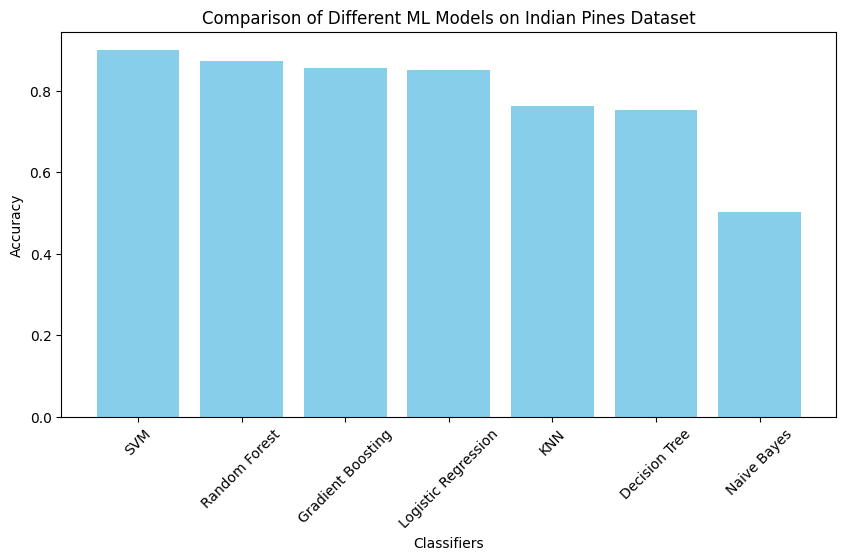

In [11]:
sorted_results=dict(sorted(results.items(),key=lambda item:item[1],reverse=True))

plt.figure(figsize=(10,5))
plt.bar(sorted_results.keys(),sorted_results.values(),color="skyblue")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparison of Different ML Models on Indian Pines Dataset")
plt.xticks(rotation=45)
plt.show()

#### Finding best model

In [12]:
best_model_name=max(results,key=results.get)
best_model=classifiers[best_model_name]

import joblib
joblib.dump(best_model,f"Model/{best_model_name}_model.pkl")

print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

Best Model: SVM with Accuracy: 0.9000


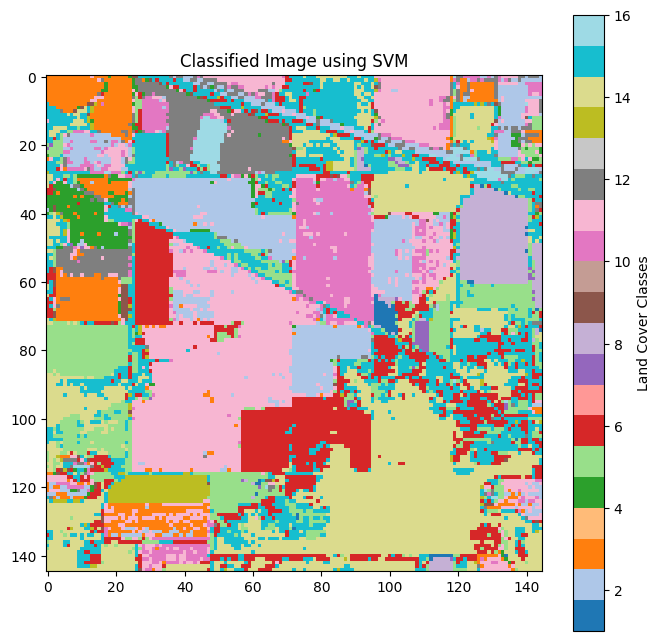

In [13]:
X_new=new_image.reshape(-1,new_image.shape[-1])
X_new=scaler.transform(X_new)

y_new_pred=best_model.predict(X_new)

classified_image=y_new_pred.reshape(new_image.shape[:2])

plt.figure(figsize=(8, 8))
plt.imshow(classified_image,cmap="tab20")
plt.colorbar(label="Land Cover Classes")
plt.title(f"Classified Image using {best_model_name}")
plt.show()

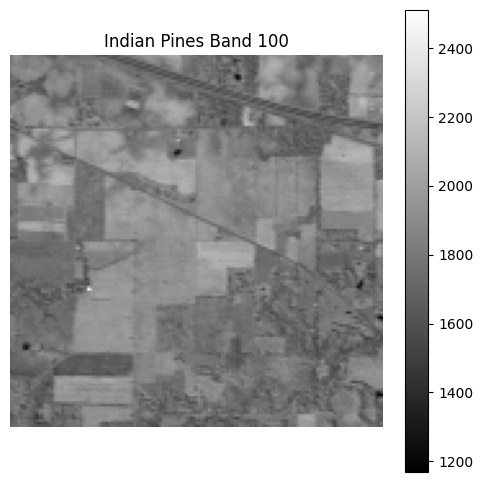

In [14]:
band_number=100
plt.figure(figsize=(6,6))
plt.imshow(image_data[:,:,band_number],cmap="gray")
plt.title(f"Indian Pines Band {band_number}")
plt.axis("off")
plt.colorbar()
plt.show()

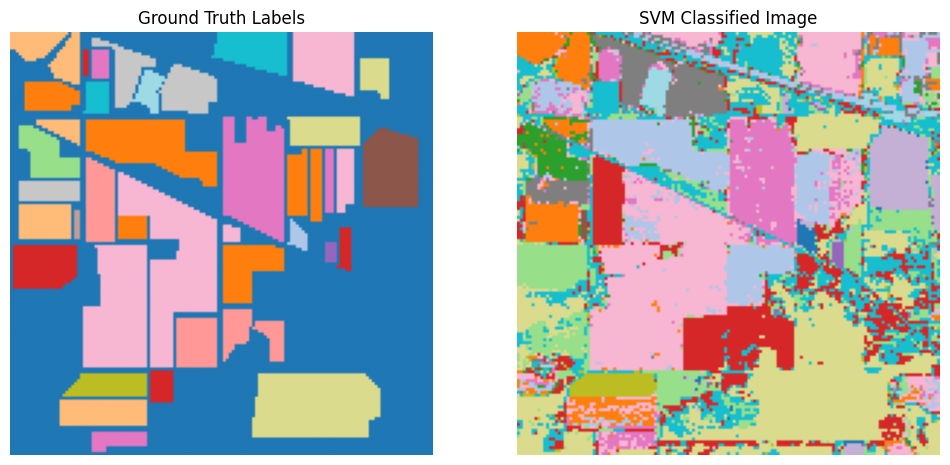

In [15]:
ground_truth=scipy.io.loadmat("Dataset/Indian_pines_gt.mat")["indian_pines_gt"]

fig,axes=plt.subplots(1,2,figsize=(12, 6))

axes[0].imshow(ground_truth,cmap="tab20")
axes[0].set_title("Ground Truth Labels")
axes[0].axis("off")

axes[1].imshow(classified_image,cmap="tab20")
axes[1].set_title("SVM Classified Image")
axes[1].axis("off")

plt.show()

In [16]:
y_true=ground_truth.ravel()  
y_pred=classified_image.ravel() 

valid_mask=y_true>0
y_true=y_true[valid_mask]
y_pred=y_pred[valid_mask]

overall_accuracy=accuracy_score(y_true,y_pred)
print("Overall Classification Accuracy of svm:",overall_accuracy)

Overall Classification Accuracy of svm: 0.9274075519562884


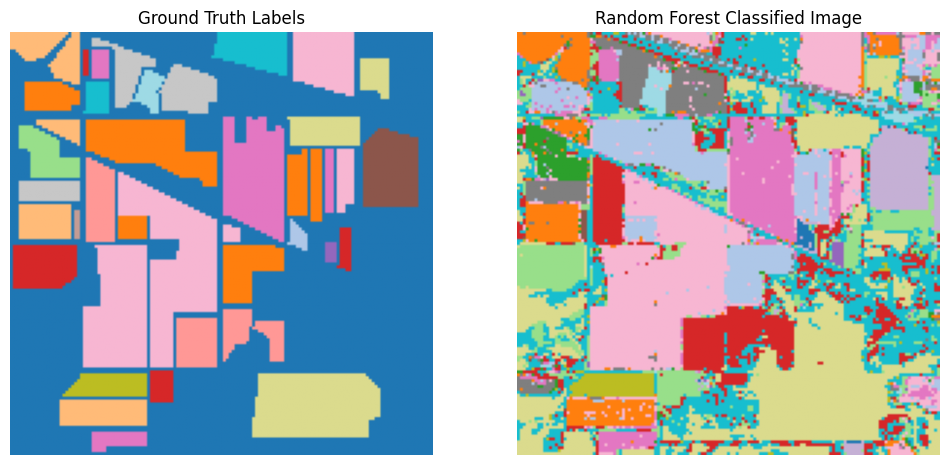

In [17]:
ground_truth=scipy.io.loadmat("Dataset/Indian_pines_gt.mat")["indian_pines_gt"]

fig,axes=plt.subplots(1,2,figsize=(12,6))

axes[0].imshow(ground_truth,cmap="tab20")
axes[0].set_title("Ground Truth Labels")
axes[0].axis("off")

axes[1].imshow(classified_image_rf,cmap="tab20")
axes[1].set_title("Random Forest Classified Image")
axes[1].axis("off")

plt.show()

In [18]:
y_true=ground_truth.ravel() 
y_pred=classified_image_rf.ravel() 

valid_mask=y_true>0
y_true=y_true[valid_mask]
y_pred=y_pred[valid_mask]

overall_accuracy=accuracy_score(y_true,y_pred)
print("Overall Classification Accuracy of random forest:",overall_accuracy)

Overall Classification Accuracy of random forest: 0.9745341008878915


#### Confusion Matrix

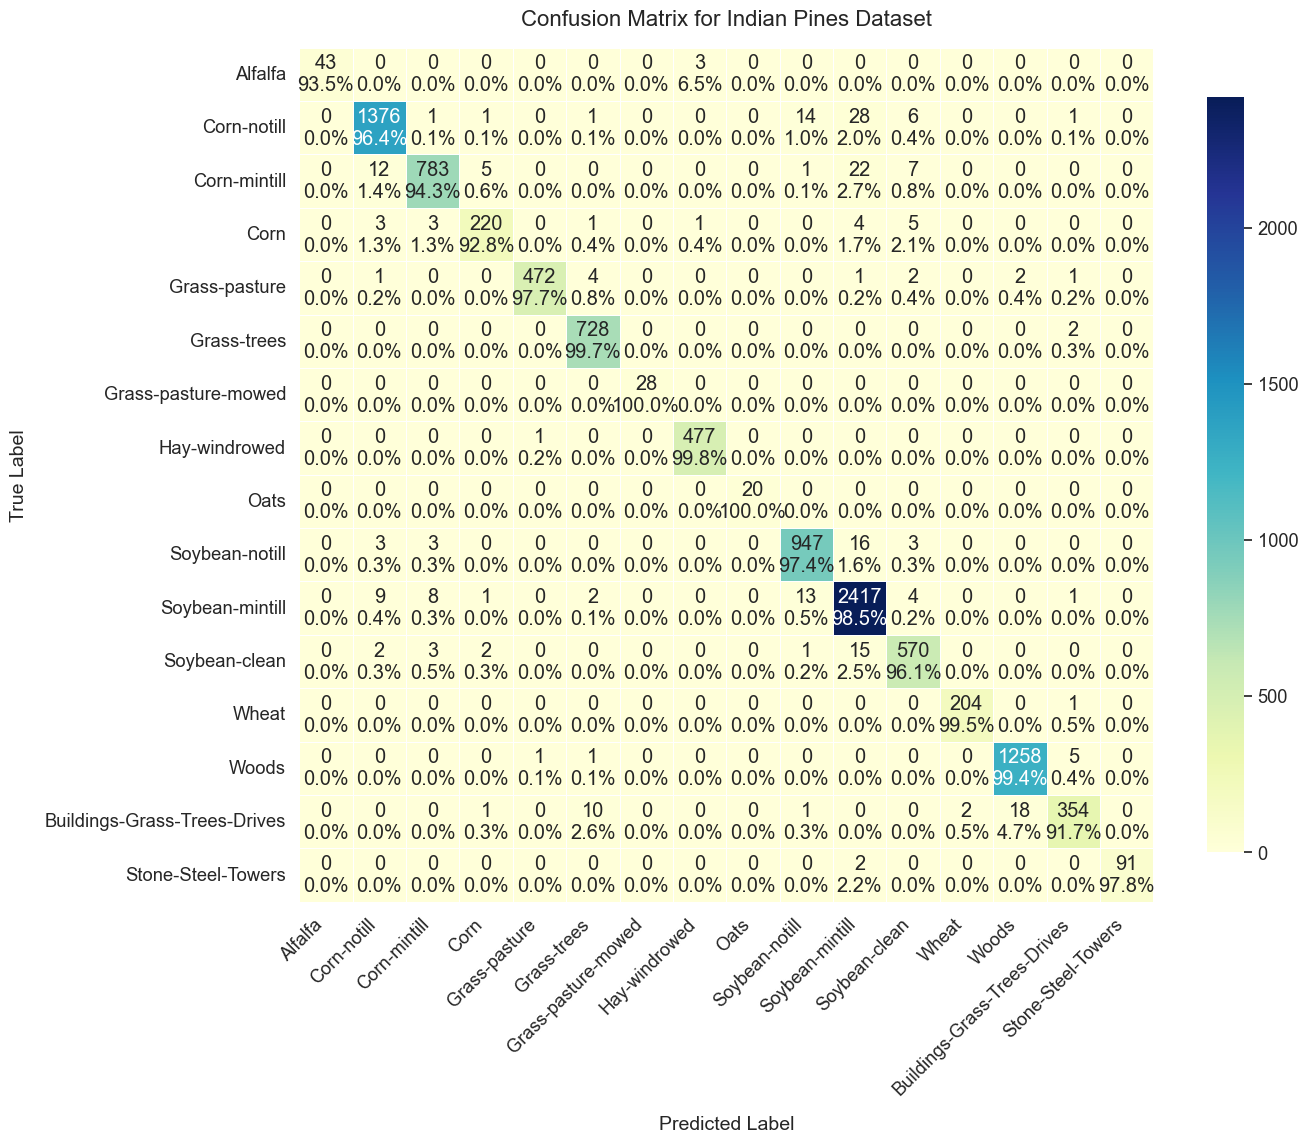

In [19]:
indian_pines_classes = [
    "Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture",
    "Grass-trees", "Grass-pasture-mowed", "Hay-windrowed", "Oats",
    "Soybean-notill", "Soybean-mintill", "Soybean-clean", "Wheat", "Woods",
    "Buildings-Grass-Trees-Drives", "Stone-Steel-Towers"
]

conf_matrix=confusion_matrix(y_true,y_pred,labels=range(1,17))

conf_matrix_percent=conf_matrix.astype(np.float64)/conf_matrix.sum(axis=1,keepdims=True)

labels=np.array([
    [f"{count}\n{percent:.1%}" if not np.isnan(percent) else "" 
     for count,percent in zip(row_counts,row_percents)]
    for row_counts,row_percents in zip(conf_matrix,conf_matrix_percent)
])

plt.figure(figsize=(14,12))
sns.set(font_scale=1.2)

ax=sns.heatmap(
    conf_matrix, 
    annot=labels, 
    fmt="", 
    cmap="YlGnBu", 
    linewidths=0.5, 
    square=True, 
    cbar_kws={"shrink": 0.8},
    xticklabels=indian_pines_classes,
    yticklabels=indian_pines_classes
)

plt.xlabel("Predicted Label",fontsize=14,labelpad=12)
plt.ylabel("True Label",fontsize=14,labelpad=12)
plt.title("Confusion Matrix for Indian Pines Dataset",fontsize=16,pad=16)
plt.xticks(rotation=45,ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
class_accuracy=conf_matrix.diagonal()/conf_matrix.sum(axis=1)
num_classes=len(class_accuracy)

for i in range(num_classes):
    print(f"Class {i+1}: {class_accuracy[i]:.2%} accuracy")

Class 1: 93.48% accuracy
Class 2: 96.36% accuracy
Class 3: 94.34% accuracy
Class 4: 92.83% accuracy
Class 5: 97.72% accuracy
Class 6: 99.73% accuracy
Class 7: 100.00% accuracy
Class 8: 99.79% accuracy
Class 9: 100.00% accuracy
Class 10: 97.43% accuracy
Class 11: 98.45% accuracy
Class 12: 96.12% accuracy
Class 13: 99.51% accuracy
Class 14: 99.45% accuracy
Class 15: 91.71% accuracy
Class 16: 97.85% accuracy
